In [429]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [430]:
df = pd.read_excel(r"C:\Users\oscar\Downloads\Co2-Emission-Data.xlsx")

In [431]:
df

,MODEL Year,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL Type,FUEL CONSUMPTION CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14248,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,11.9,8.3,10.3,27,237
14249,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,11.7,8.0,10.0,28,230
14250,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,11.9,8.3,10.3,27,237
14251,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,11.4,7.8,9.8,29,225


## Data Preprocessing

In [432]:
df.isna().sum()

MODEL Year                          0
MAKE                                0
MODEL (# = high output engine)      0
VEHICLE CLASS                       0
ENGINE SIZE (L)                     0
CYLINDERS                           0
TRANSMISSION                        0
FUEL Type                           0
FUEL CONSUMPTION CITY (L/100 km)    0
HWY (L/100 km)                      0
COMB (L/100 km)                     0
COMB (mpg)                          0
CO2 EMISSIONS (g/km)                0
dtype: int64

No missing Value in the data

In [433]:
# Check for duplicate Values
df.duplicated().sum()

1

In [434]:
df = df.drop_duplicates()

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14252 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL Year                        14252 non-null  int64  
 1   MAKE                              14252 non-null  object 
 2   MODEL (# = high output engine)    14252 non-null  object 
 3   VEHICLE CLASS                     14252 non-null  object 
 4   ENGINE SIZE (L)                   14252 non-null  float64
 5   CYLINDERS                         14252 non-null  int64  
 6   TRANSMISSION                      14252 non-null  object 
 7   FUEL Type                         14252 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  14252 non-null  float64
 9   HWY (L/100 km)                    14252 non-null  float64
 10  COMB (L/100 km)                   14252 non-null  float64
 11  COMB (mpg)                        14252 non-null  int64  
 12  CO2 EMISS

## EDA

Numeric Variables

In [436]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.columns

Index(['MODEL Year', 'ENGINE SIZE (L)', 'CYLINDERS',
       'FUEL CONSUMPTION CITY (L/100 km)', 'HWY (L/100 km)', 'COMB (L/100 km)',
       'COMB (mpg)', 'CO2 EMISSIONS (g/km)'],
      dtype='object')

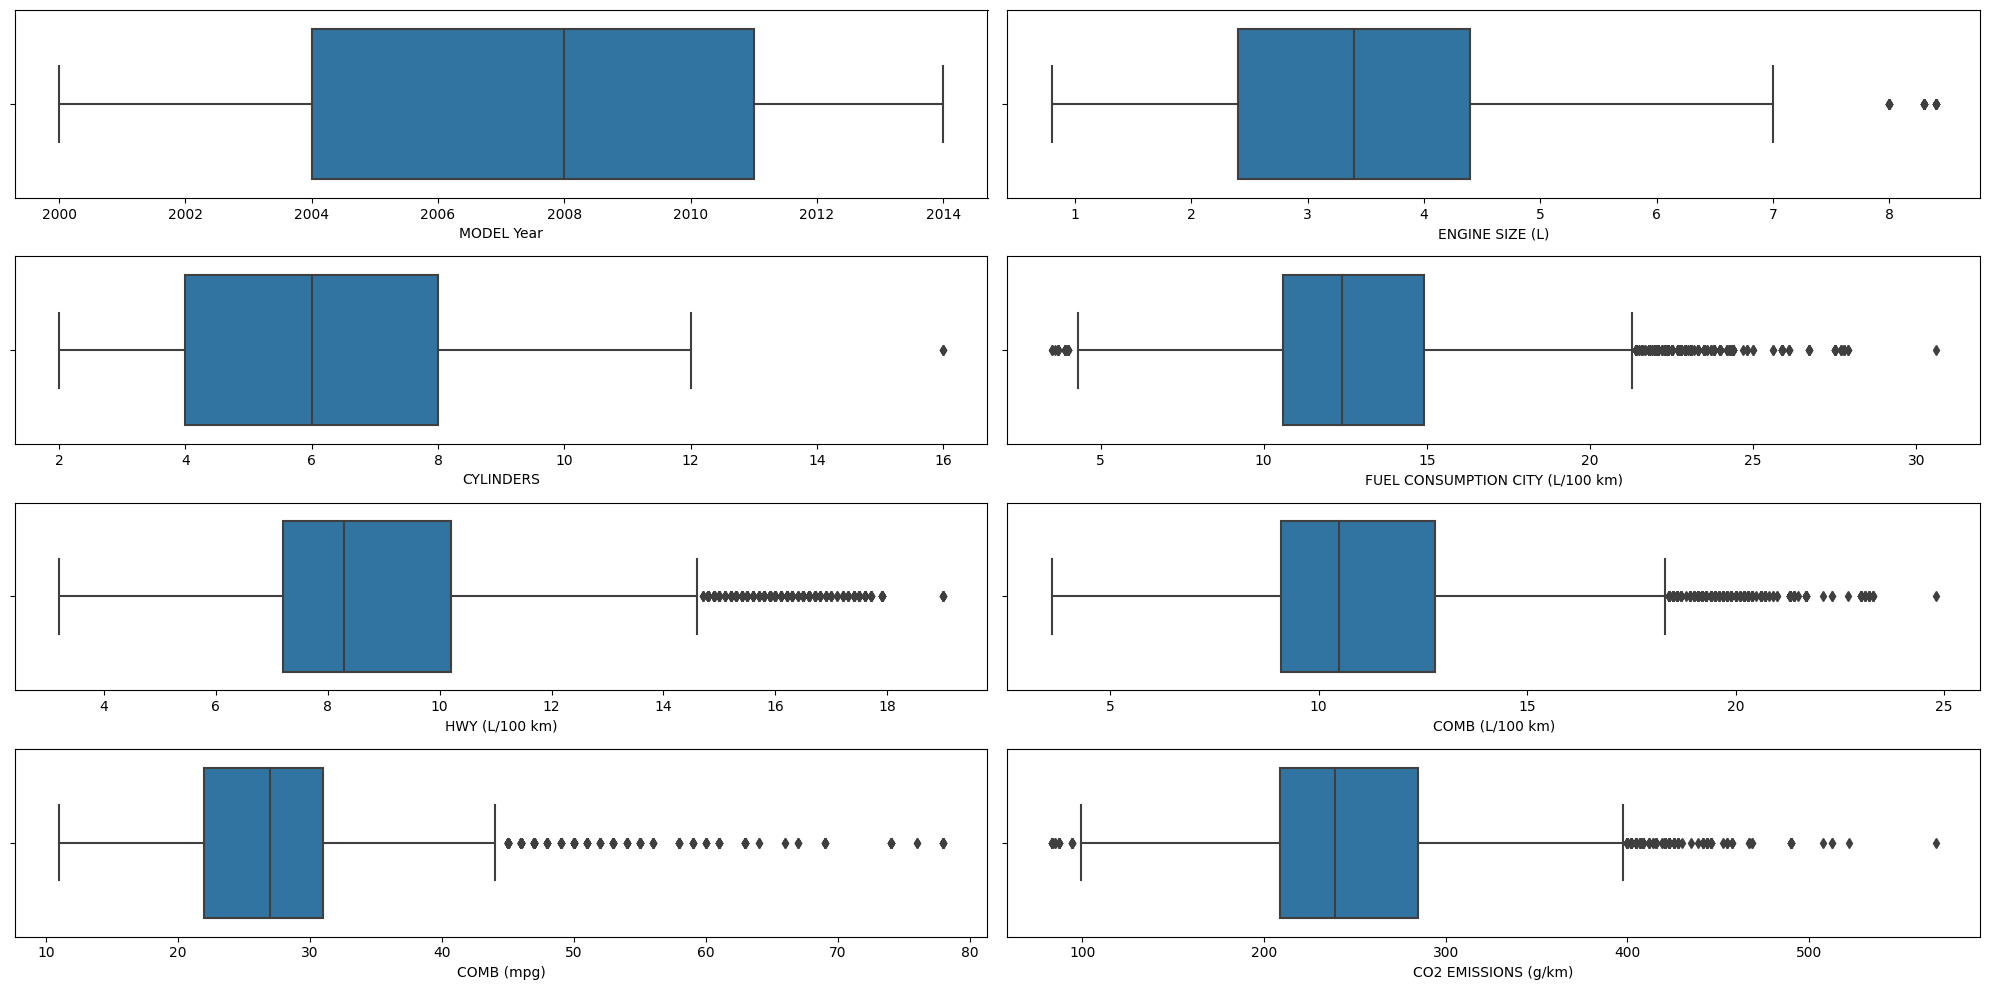

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numeric_df is your DataFrame with numeric columns
columns_to_plot = numeric_df.columns[:8]  # Select the first eight columns

fig, axes = plt.subplots(4, 2, figsize=(20, 10))  # Set up a 4x2 subplot grid

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Iterate over the selected columns and their corresponding axes to plot
for col, ax in zip(columns_to_plot, axes_flat):
    sns.boxplot(x=col, data=numeric_df, ax=ax)

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()  # Display the plots


<Axes: >

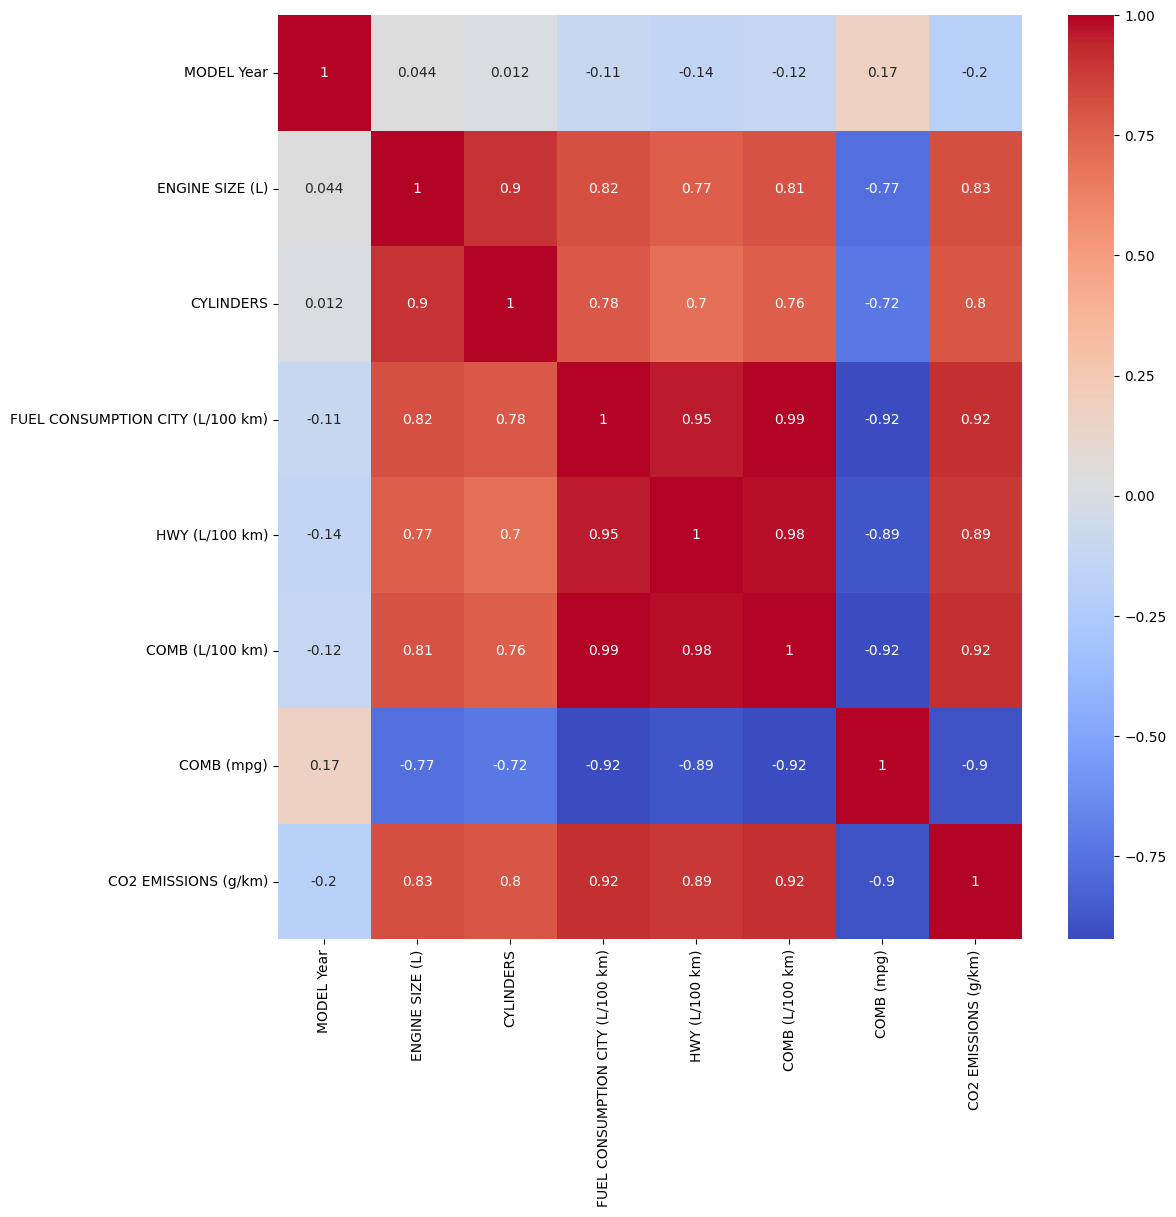

In [438]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', 
            xticklabels=numeric_df.columns,
            yticklabels=numeric_df.columns)

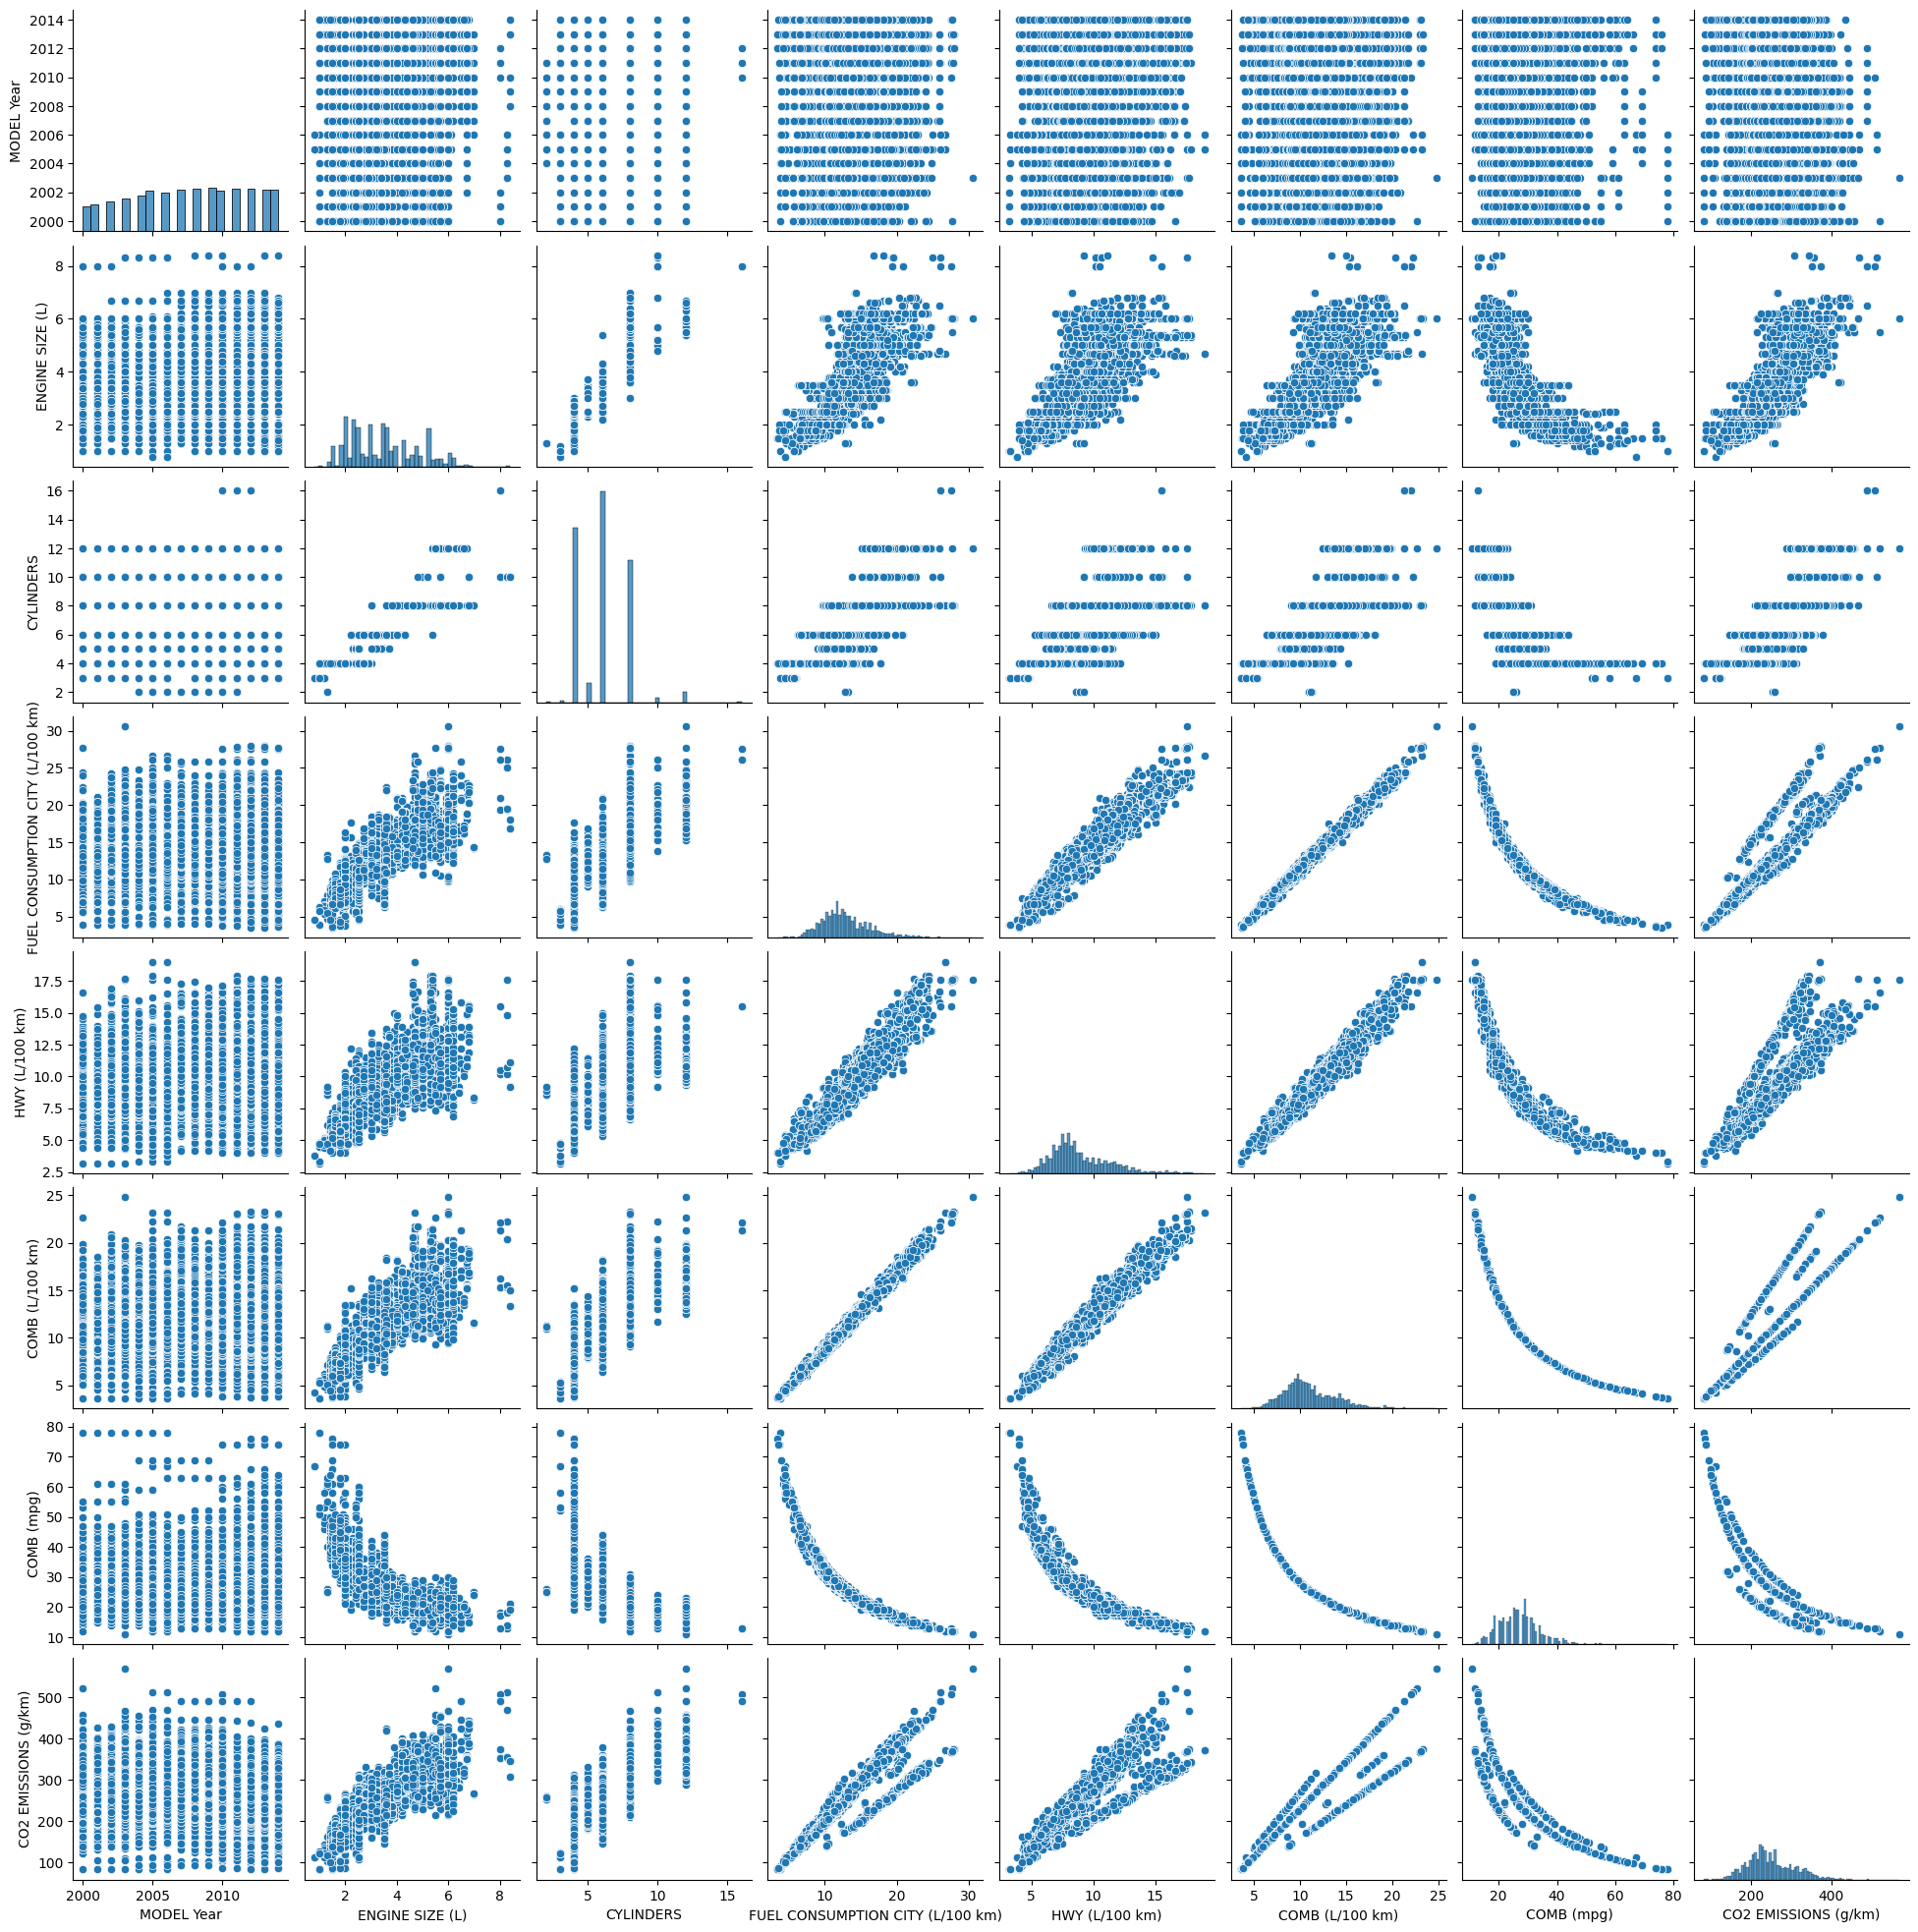

In [439]:
import seaborn as sns

# Now, make a Seaborn pairplot with the correctly specified columns and the chosen color palette
sns.pairplot(numeric_df)

In [467]:
# Calculate IQR for 'CO2 Emissions'
Q1_CO2 = df['CO2 EMISSIONS (g/km)'].quantile(0.25)
Q3_CO2 = df['CO2 EMISSIONS (g/km)'].quantile(0.75)
IQR_CO2 = Q3_CO2 - Q1_CO2
lower_bound_CO2 = Q1_CO2 - 1.5 * IQR_CO2
upper_bound_CO2 = Q3_CO2 + 1.5 * IQR_CO2

# Calculate IQR for 'HWY (L/100 km)'
Q1_HWY = df['HWY (L/100 km)'].quantile(0.25)
Q3_HWY = df['HWY (L/100 km)'].quantile(0.75)
IQR_HWY = Q3_HWY - Q1_HWY
lower_bound_HWY = Q1_HWY - 1.5 * IQR_HWY
upper_bound_HWY = Q3_HWY + 1.5 * IQR_HWY

limit = 7

# Filter out the outliers for both 'CO2 Emissions' and 'HWY (L/100 km)'
df_no_outliers = df[(df['CO2 EMISSIONS (g/km)'] >= lower_bound_CO2) & 
                    (df['CO2 EMISSIONS (g/km)'] <= upper_bound_CO2) &
                    (df['HWY (L/100 km)'] >= lower_bound_HWY) &
                    (df['HWY (L/100 km)'] <= upper_bound_HWY)&
                    (df['ENGINE SIZE (L)'] <= limit)]


In [468]:
df.shape

(14252, 13)

In [469]:
df_no_outliers.shape

(13733, 13)

## Categorical Variable

In [470]:
unique_counts = df_no_outliers['VEHICLE CLASS'].value_counts()

# If you want to print the counts
print(unique_counts)


VEHICLE CLASS
SUV                         2545
COMPACT                     2106
MID-SIZE                    1731
PICKUP TRUCK - STANDARD     1391
SUBCOMPACT                  1279
FULL-SIZE                    798
TWO-SEATER                   717
MINICOMPACT                  627
STATION WAGON - SMALL        620
PICKUP TRUCK - SMALL         327
MINIVAN                      327
STATION WAGON - MID-SIZE     320
SUV - SMALL                  294
VAN - CARGO                  256
SUV - STANDARD               198
VAN - PASSENGER              181
SPECIAL PURPOSE VEHICLE       16
Name: count, dtype: int64


In [471]:
df_no_outliers = df_no_outliers[df_no_outliers['VEHICLE CLASS'] != 'SPECIAL PURPOSE VEHICLE']

In [445]:
vehicle_class_mapping = {
    'SUV': 'SUV_GROUP',
    'SUV - SMALL': 'SUV_GROUP',
    'SUV - STANDARD': 'SUV_GROUP',
    'VAN - CARGO': 'VAN_GROUP',
    'VAN - PASSENGER': 'VAN_GROUP'
}

# Replace the 'VEHICLE CLASS' values with the group identifiers
df_no_outliers['VEHICLE CLASS'] = df_no_outliers['VEHICLE CLASS'].replace(vehicle_class_mapping)

In [472]:
unique_counts = df['FUEL Type'].value_counts()

# If you want to print the counts
print(unique_counts)


FUEL Type
X    7798
Z    5547
E     765
D     110
N      32
Name: count, dtype: int64


In [473]:
# Assuming 'Category1' and 'Category2' are the categorical columns in your DataFrame df
cross_tab = pd.crosstab(df_no_outliers['VEHICLE CLASS'], df_no_outliers['FUEL Type'])

# This will print the cross-tabulation to your console
print(cross_tab)

FUEL Type                  D    E   N     X    Z
VEHICLE CLASS                                   
COMPACT                   32   24   1  1080  969
FULL-SIZE                  2   53   2   371  370
MID-SIZE                  12   53   0   925  741
MINICOMPACT                0    0   0    51  576
MINIVAN                    0   44   0   280    3
PICKUP TRUCK - SMALL       0    8   0   319    0
PICKUP TRUCK - STANDARD    2  121   4  1201   63
STATION WAGON - MID-SIZE   1    1   0   121  197
STATION WAGON - SMALL      9    0   0   333  278
SUBCOMPACT                14    3   1   418  843
SUV                       27  106   0  1881  531
SUV - SMALL                1   10   0   237   46
SUV - STANDARD             7   37   0    88   66
TWO-SEATER                 3    0   0     9  705
VAN - CARGO                0    2  12   242    0
VAN - PASSENGER            0    0   2   179    0


Frop N and D fuel type since they are outlier

In [474]:
# List of values you want to drop
values_to_drop = ['N', 'D']

# Drop rows where 'Column_Name' matches any value in 'values_to_drop'
df_filtered = df_no_outliers[~df_no_outliers['FUEL Type'].isin(values_to_drop)]

In [475]:
df_filtered.shape

(13585, 13)

In [476]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13585 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL Year                        13585 non-null  int64  
 1   MAKE                              13585 non-null  object 
 2   MODEL (# = high output engine)    13585 non-null  object 
 3   VEHICLE CLASS                     13585 non-null  object 
 4   ENGINE SIZE (L)                   13585 non-null  float64
 5   CYLINDERS                         13585 non-null  int64  
 6   TRANSMISSION                      13585 non-null  object 
 7   FUEL Type                         13585 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  13585 non-null  float64
 9   HWY (L/100 km)                    13585 non-null  float64
 10  COMB (L/100 km)                   13585 non-null  float64
 11  COMB (mpg)                        13585 non-null  int64  
 12  CO2 EMISS

In [477]:
df_filtered.columns

Index(['MODEL Year', 'MAKE', 'MODEL (# = high output engine)', 'VEHICLE CLASS',
       'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL Type',
       'FUEL CONSUMPTION CITY (L/100 km)', 'HWY (L/100 km)', 'COMB (L/100 km)',
       'COMB (mpg)', 'CO2 EMISSIONS (g/km)'],
      dtype='object')

In [458]:
df_filtered1 = df_filtered[['MODEL Year','VEHICLE CLASS', 'FUEL Type', 'ENGINE SIZE (L)', 'CO2 EMISSIONS (g/km)']]

In [461]:
import pandas as pd

# Perform one-hot encoding on 'VEHICLE CLASS' and 'FUEL Type'
df_encoded1 = pd.get_dummies(df_filtered1, columns=['VEHICLE CLASS', 'FUEL Type'])

K-Mean

In [478]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

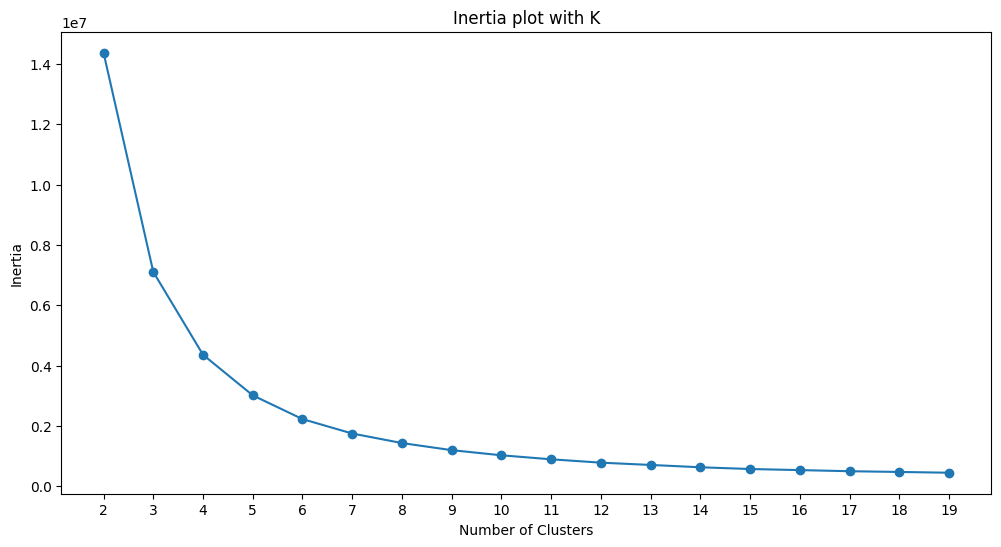

In [479]:
inertia_plot(KMeans, df_encoded1)

Cluster of 5 looks like the best

In [480]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    for x in range(start, stop):
        km = clust(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

In [481]:
for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(df_encoded1)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(df_encoded1, label))

Silhouette-Score for 2 Clusters:  0.5701831938748751
Silhouette-Score for 3 Clusters:  0.5244864207437049
Silhouette-Score for 4 Clusters:  0.5112308013729876
Silhouette-Score for 5 Clusters:  0.49623727993114525
Silhouette-Score for 6 Clusters:  0.48862603170775887


In [482]:
X = df_encoded1.copy()

Silhouette-Score for 2 Clusters:  0.5680344870603796        Inertia:  14372119.262934146
Silhouette-Score for 3 Clusters:  0.5228660799230918        Inertia:  7115906.2594307335
Silhouette-Score for 4 Clusters:  0.5110051061132296        Inertia:  4362605.156746382
Silhouette-Score for 5 Clusters:  0.4971155211693736        Inertia:  3006506.7943324447
Silhouette-Score for 6 Clusters:  0.48689226773720107        Inertia:  2229834.9815062126
Silhouette-Score for 7 Clusters:  0.469068986599368        Inertia:  1761683.3028269657
Silhouette-Score for 8 Clusters:  0.4636560041099664        Inertia:  1426629.554163767
Silhouette-Score for 9 Clusters:  0.44660826430998496        Inertia:  1197575.266981782
Silhouette-Score for 10 Clusters:  0.446211965251857        Inertia:  1020336.0002512173
Silhouette-Score for 11 Clusters:  0.43165667720119477        Inertia:  884680.336721482
Silhouette-Score for 12 Clusters:  0.42256740885577493        Inertia:  788199.1717239658
Silhouette-Score for 1

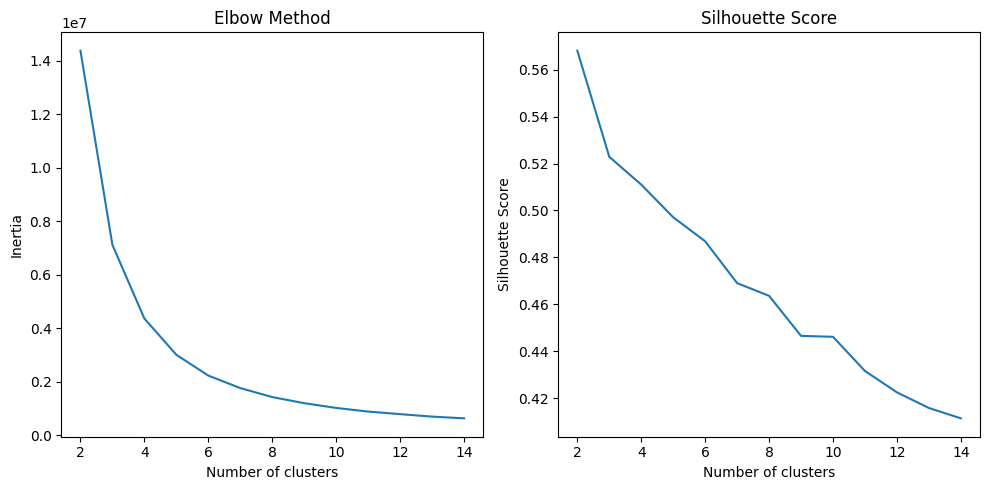

In [483]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

inertia = []
silhouette_scores = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    
# Calculate the silhouette_sco
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print('Silhouette-Score for', i,  'Clusters: ', silhouette_avg , '       Inertia: ',kmeans.inertia_)

# Silhouette Score
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

if silhouette_scores:
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 15), silhouette_scores)
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## Agglomerative Clustering

For 2 clusters, the silhouette score is 0.51
For 3 clusters, the silhouette score is 0.50
For 4 clusters, the silhouette score is 0.48
For 5 clusters, the silhouette score is 0.45
For 6 clusters, the silhouette score is 0.45
For 7 clusters, the silhouette score is 0.45
For 8 clusters, the silhouette score is 0.44
For 9 clusters, the silhouette score is 0.41
For 10 clusters, the silhouette score is 0.41


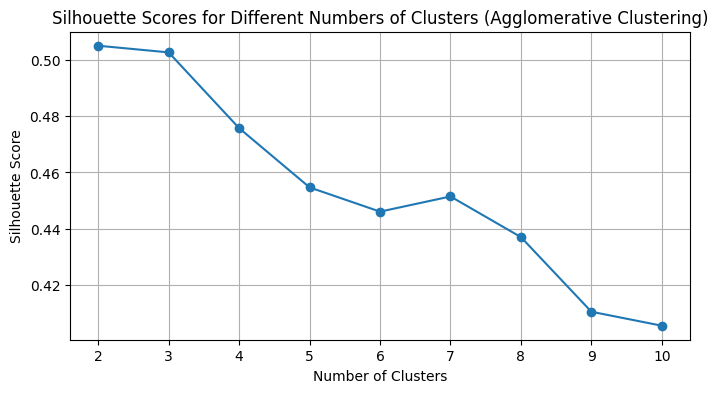

In [484]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

n_clusters_range = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(X)
    
    # Calculate and store the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Print the silhouette score for each number of clusters
    print(f"For {n_clusters} clusters, the silhouette score is {silhouette_avg:.2f}")

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


K-Mean is better

In [486]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# create a 'cluster' column
df_filtered1['cluster2'] = labels

silhouette_avg = silhouette_score(X, labels)
print(silhouette_avg)

0.5680344870603796


In [487]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# create a 'cluster' column
df_filtered1['cluster4'] = labels

silhouette_avg = silhouette_score(X, labels)
print(silhouette_avg)

0.5110051061132296


In [489]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# create a 'cluster' column
df_filtered1['cluster5'] = labels
silhouette_avg = silhouette_score(X, labels)
print(silhouette_avg)

0.4971155211693736


Choose Cluster of 4 since it has the second highest Silhouette Score and more informative than only 2 clusters.

In [491]:
# Show the number of datapoint in each cluster
cluster_counts = df_filtered1['cluster2'].value_counts()
print(cluster_counts)

cluster2
0    8762
1    4845
Name: count, dtype: int64


In [492]:
# Show the number of datapoint in each cluster
cluster_counts = df_filtered1['cluster4'].value_counts()
print(cluster_counts)

cluster4
2    5262
1    3471
0    2627
3    2247
Name: count, dtype: int64


In [493]:
# Show the number of datapoint in each cluster
cluster_counts = df_filtered1['cluster5'].value_counts()
print(cluster_counts)

cluster5
1    4141
3    3510
4    2220
2    2153
0    1583
Name: count, dtype: int64


In [494]:
df_n = df_filtered1.select_dtypes(include=['number'])

In [495]:
df_n.columns

Index(['MODEL Year', 'ENGINE SIZE (L)', 'CO2 EMISSIONS (g/km)', 'cluster2',
       'cluster4', 'cluster5'],
      dtype='object')

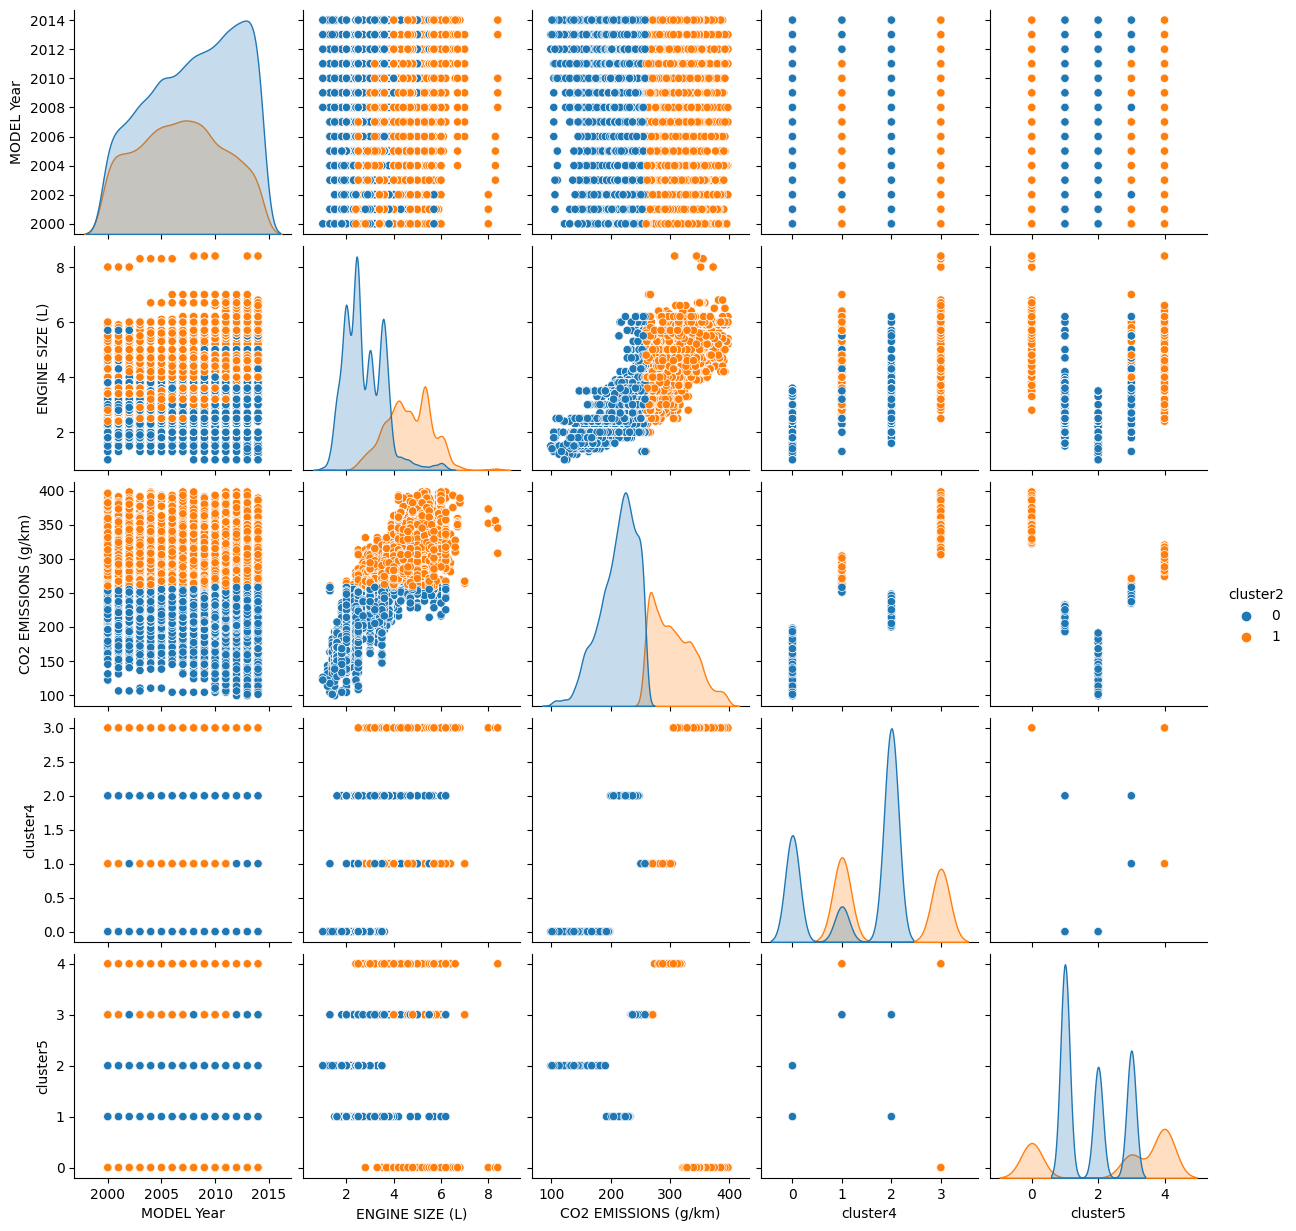

In [496]:
# make a Seaborn pairplot
sns.pairplot(df_n, hue='cluster2')

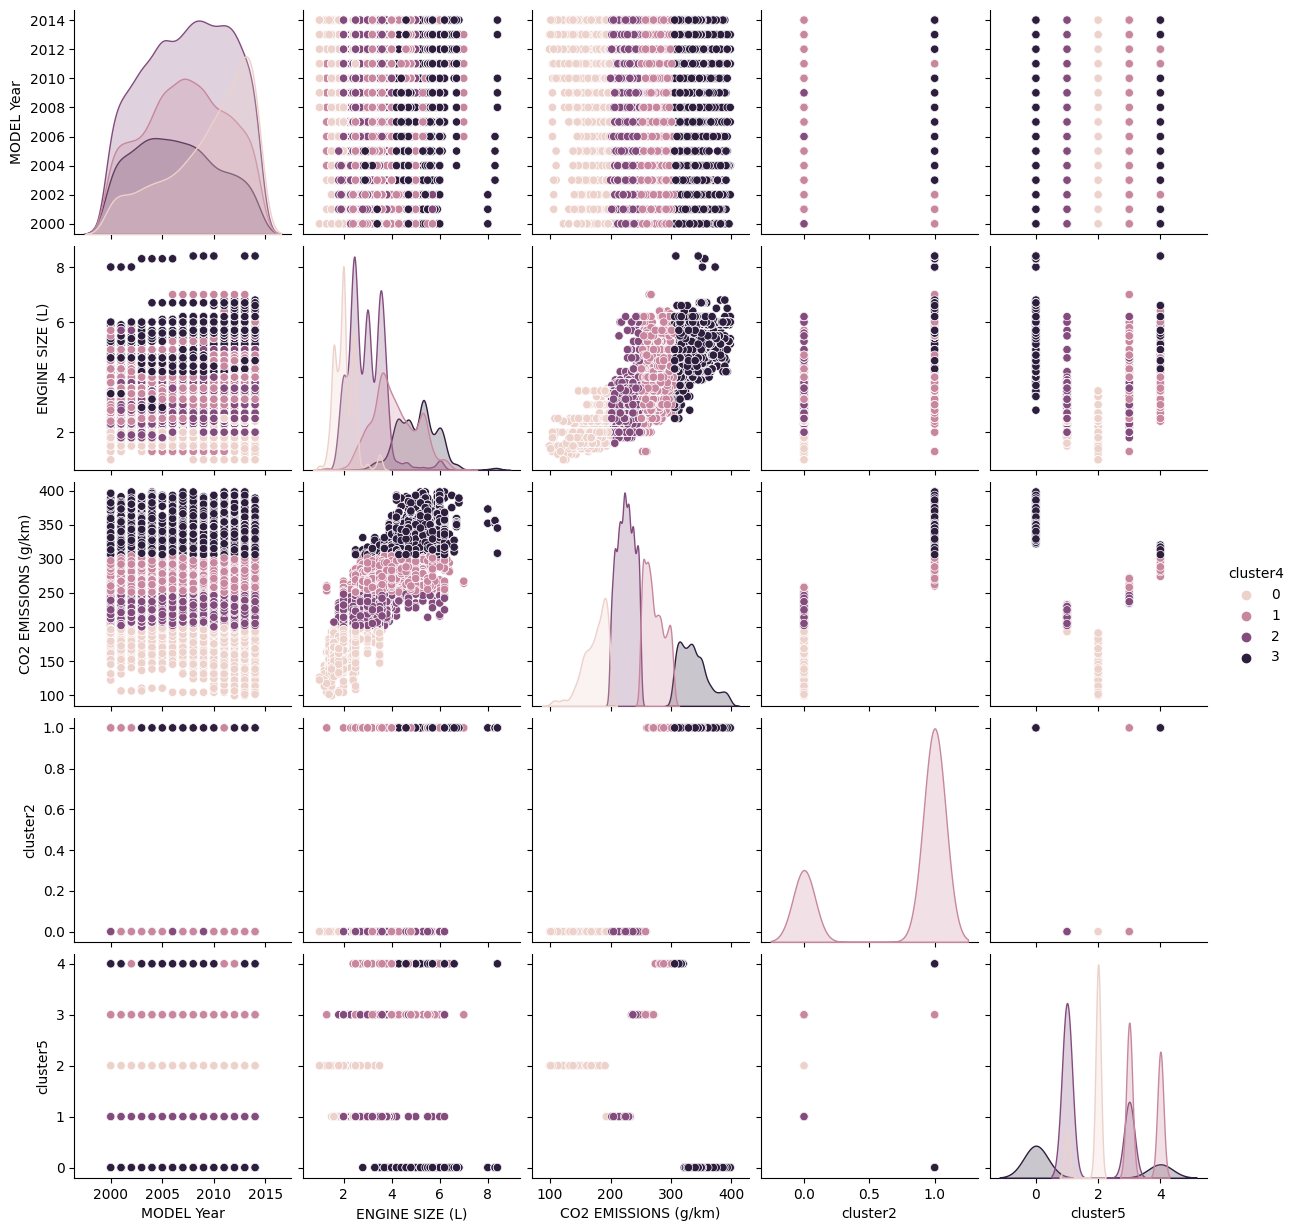

In [497]:
# make a Seaborn pairplot
sns.pairplot(df_n, hue='cluster4')

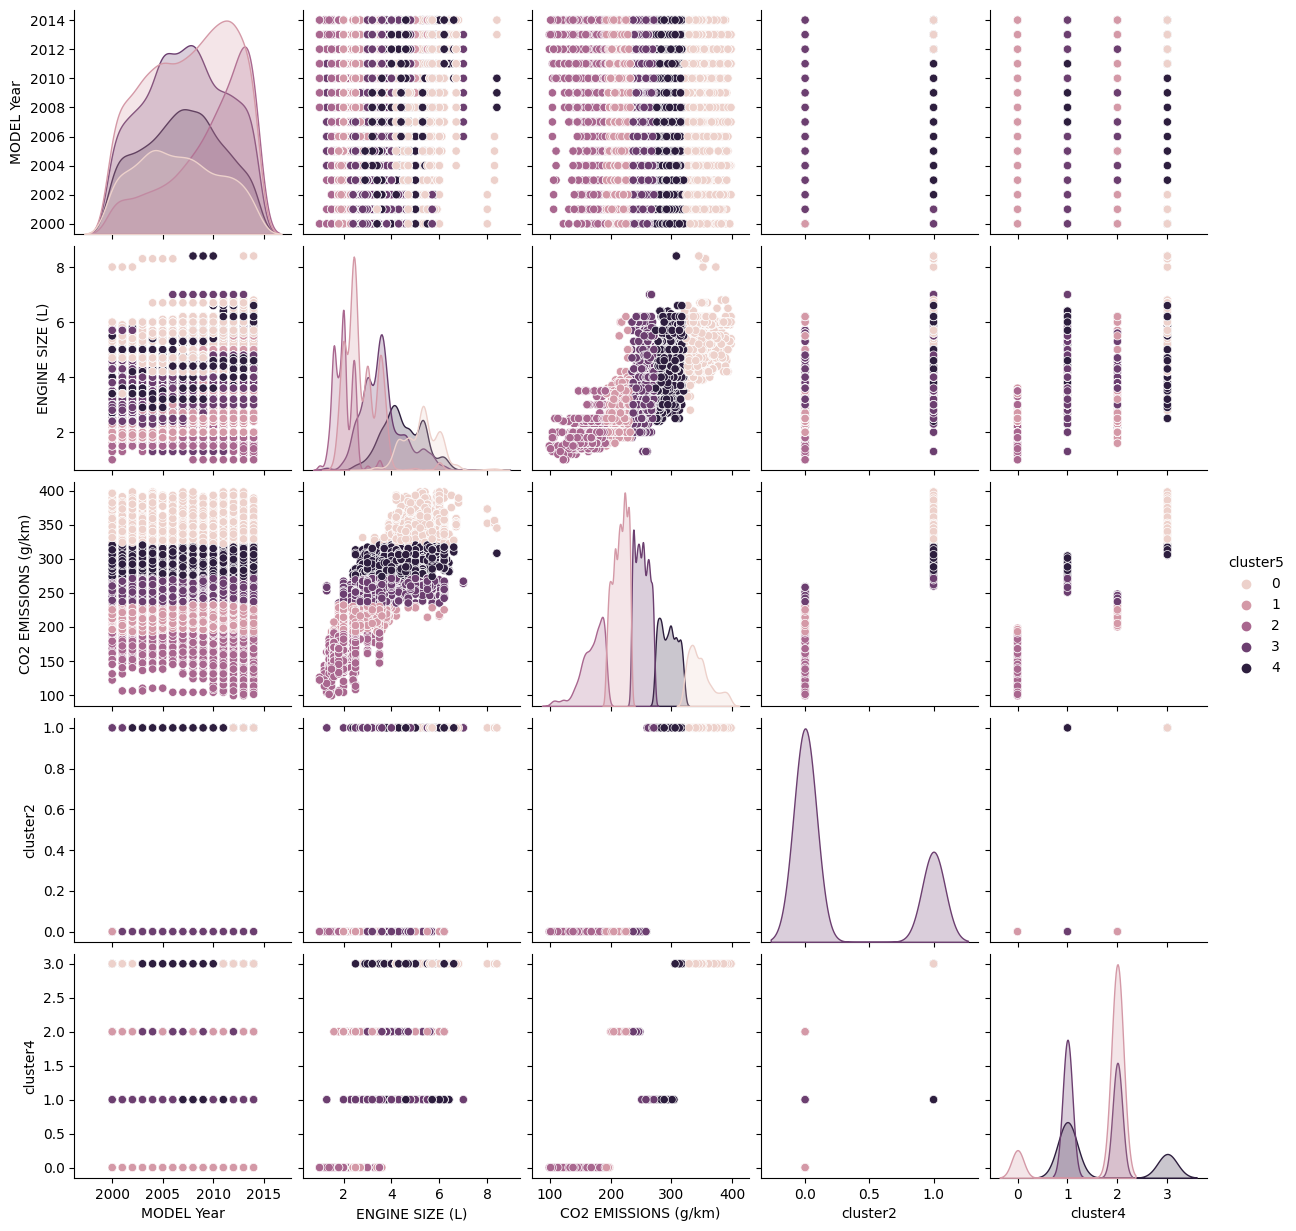

In [498]:
# make a Seaborn pairplot
sns.pairplot(df_n, hue='cluster5')

In [502]:
# Mean of feature group by cluster
mean_df2 = df_n.groupby('cluster2').mean().reset_index()

In [504]:
df_n

,MODEL Year,ENGINE SIZE (L),CO2 EMISSIONS (g/km),cluster2,cluster4,cluster5
0,2000,1.6,186,0,0,2
1,2000,1.6,175,0,0,2
2,2000,3.2,230,0,2,1
3,2000,3.5,264,1,1,3
4,2000,1.8,198,0,0,1
...,...,...,...,...,...,...
14248,2014,3.0,237,0,2,3
14249,2014,3.2,230,0,2,1
14250,2014,3.0,237,0,2,3
14251,2014,3.2,225,0,2,1


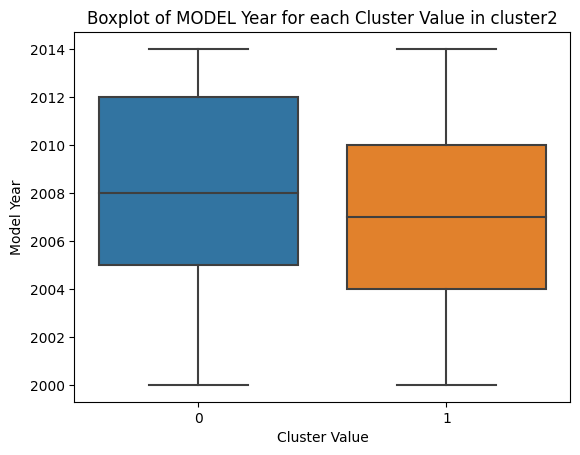

In [505]:
sns.boxplot(x='cluster2', y='MODEL Year', data=df_n)

plt.title('Boxplot of MODEL Year for each Cluster Value in cluster2')
plt.xlabel('Cluster Value')
plt.ylabel('Model Year')

# Finally, display the plot.
plt.show()

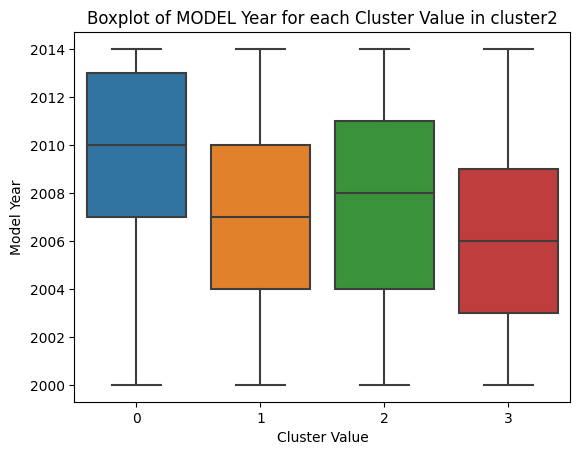

In [506]:
sns.boxplot(x='cluster4', y='MODEL Year', data=df_n)

plt.title('Boxplot of MODEL Year for each Cluster Value in cluster2')
plt.xlabel('Cluster Value')
plt.ylabel('Model Year')

# Finally, display the plot.
plt.show()

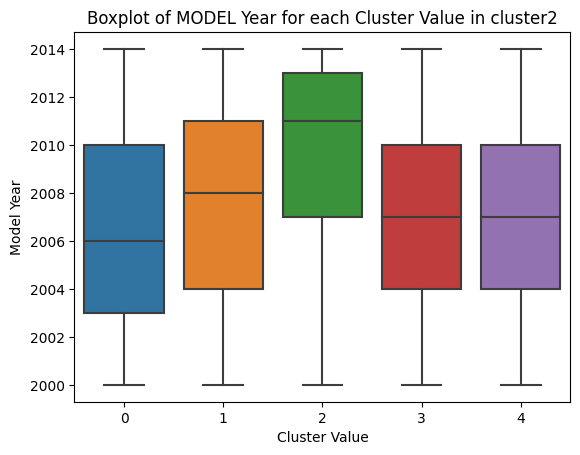

In [507]:
sns.boxplot(x='cluster5', y='MODEL Year', data=df_n)

plt.title('Boxplot of MODEL Year for each Cluster Value in cluster2')
plt.xlabel('Cluster Value')
plt.ylabel('Model Year')

# Finally, display the plot.
plt.show()

In [508]:
df_filtered1.columns

Index(['MODEL Year', 'VEHICLE CLASS', 'FUEL Type', 'ENGINE SIZE (L)',
       'CO2 EMISSIONS (g/km)', 'cluster2', 'cluster4', 'cluster5'],
      dtype='object')

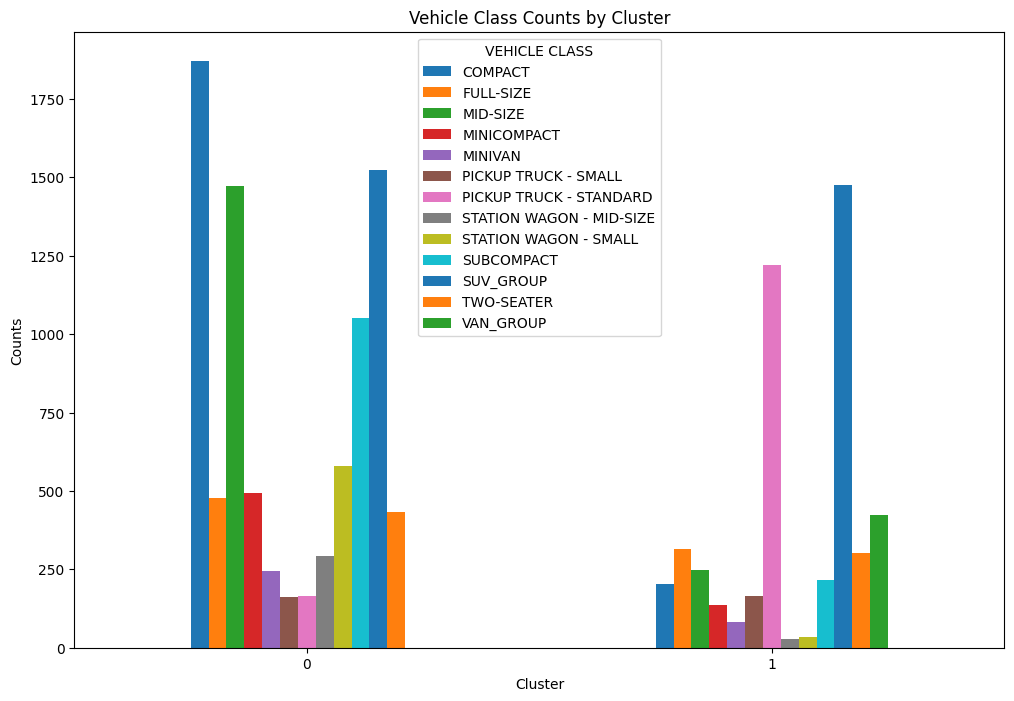

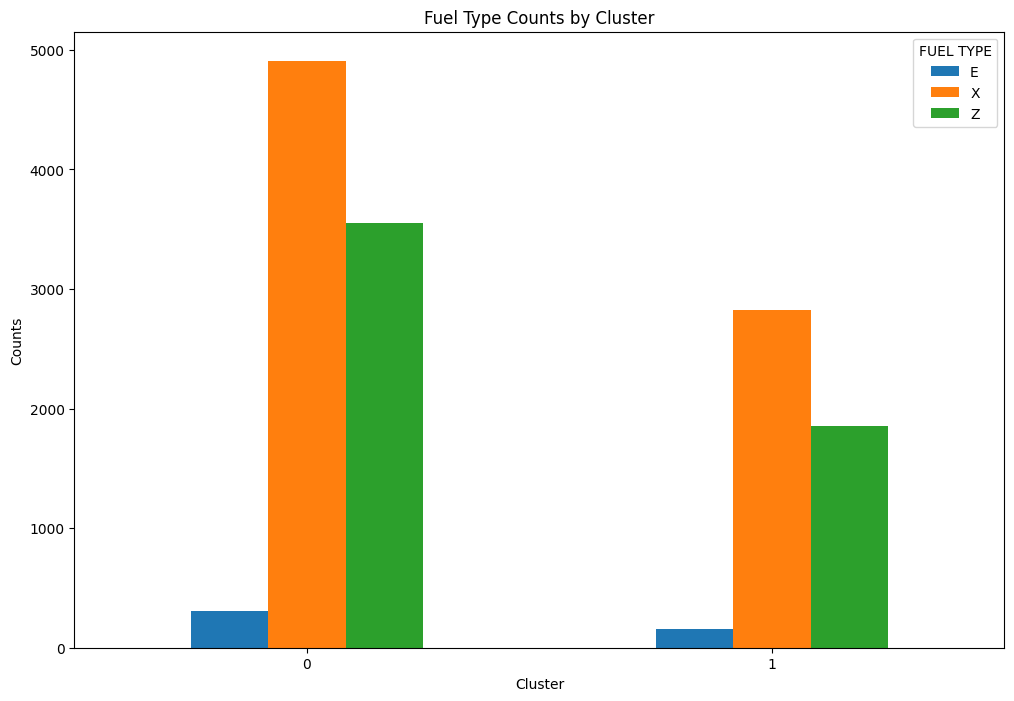

In [524]:
from tabulate import tabulate

# Assuming df_filtered is your DataFrame

# Group by 'cluster' and 'VEHICLE CLASS', then count the occurrences
vehicle_class_counts = df_filtered1.groupby(['cluster2', 'VEHICLE CLASS']).size().unstack(fill_value=0)

# Group by 'cluster' and 'FUEL Type', then count the occurrences
fuel_type_counts = df_filtered1.groupby(['cluster2', 'FUEL Type']).size().unstack(fill_value=0)

# Set the desired size of the plot
plot_size = (12, 8)  # Width, Height in inches

# Create a bar plot for vehicle class counts with increased size
vehicle_class_counts.plot(kind='bar', stacked=False, figsize=plot_size)
plt.title('Vehicle Class Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotates X-axis labels to show them horizontally
plt.legend(title='VEHICLE CLASS')
plt.show()

# Create a bar plot for fuel type counts with increased size
fuel_type_counts.plot(kind='bar', stacked=False, figsize=plot_size)
plt.title('Fuel Type Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotates X-axis labels to show them horizontally
plt.legend(title='FUEL TYPE')
plt.show()



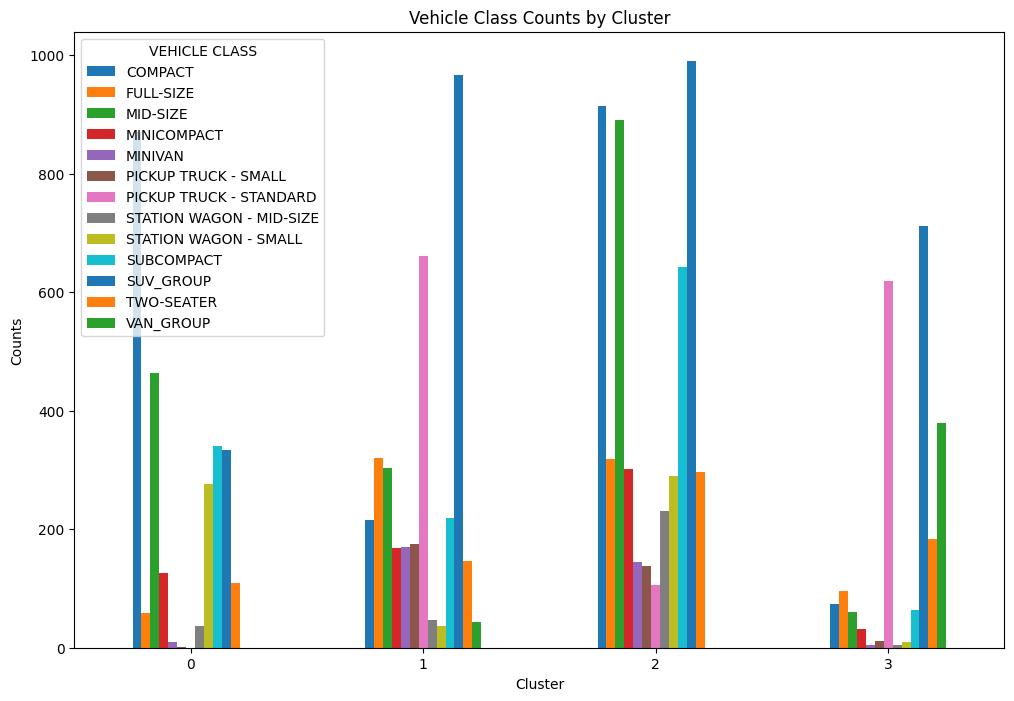

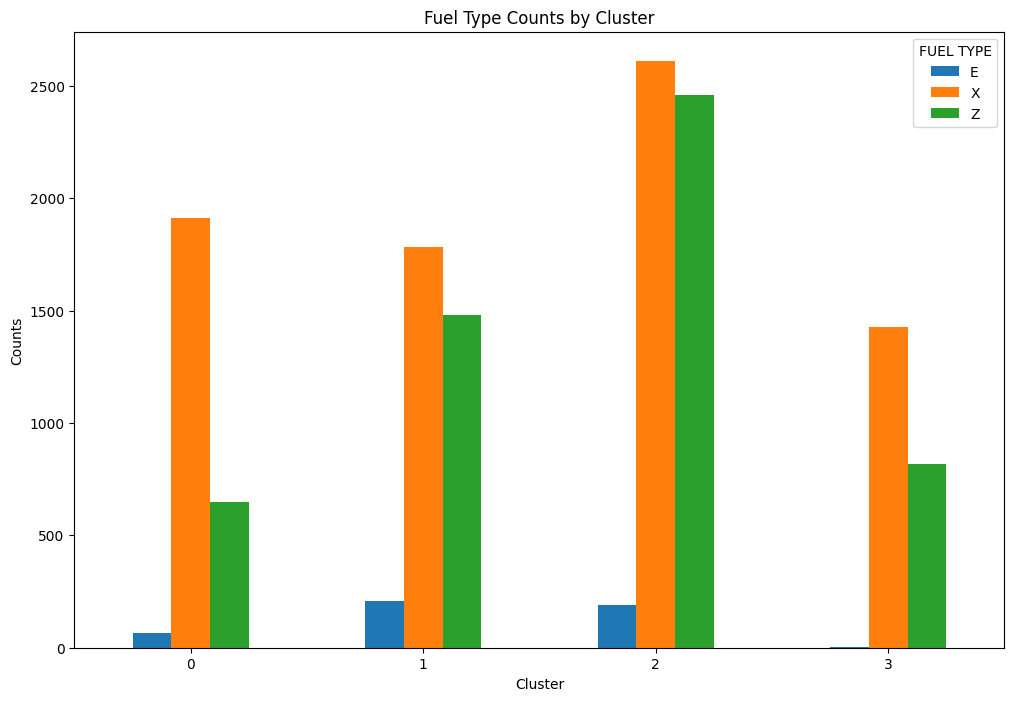

In [525]:
# Assuming df_filtered is your DataFrame

# Group by 'cluster' and 'VEHICLE CLASS', then count the occurrences
vehicle_class_counts = df_filtered1.groupby(['cluster4', 'VEHICLE CLASS']).size().unstack(fill_value=0)

# Group by 'cluster' and 'FUEL Type', then count the occurrences
fuel_type_counts = df_filtered1.groupby(['cluster4', 'FUEL Type']).size().unstack(fill_value=0)

# Set the desired size of the plot
plot_size = (12, 8)  # Width, Height in inches

# Create a bar plot for vehicle class counts with increased size
vehicle_class_counts.plot(kind='bar', stacked=False, figsize=plot_size)
plt.title('Vehicle Class Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotates X-axis labels to show them horizontally
plt.legend(title='VEHICLE CLASS')
plt.show()

# Create a bar plot for fuel type counts with increased size
fuel_type_counts.plot(kind='bar', stacked=False, figsize=plot_size)
plt.title('Fuel Type Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotates X-axis labels to show them horizontally
plt.legend(title='FUEL TYPE')
plt.show()

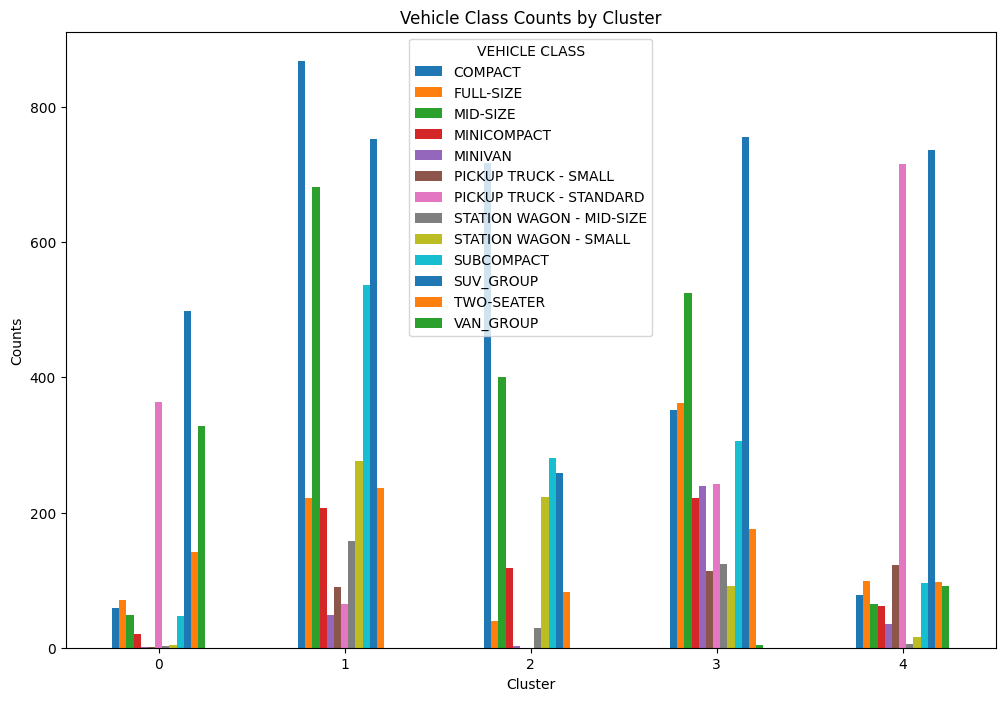

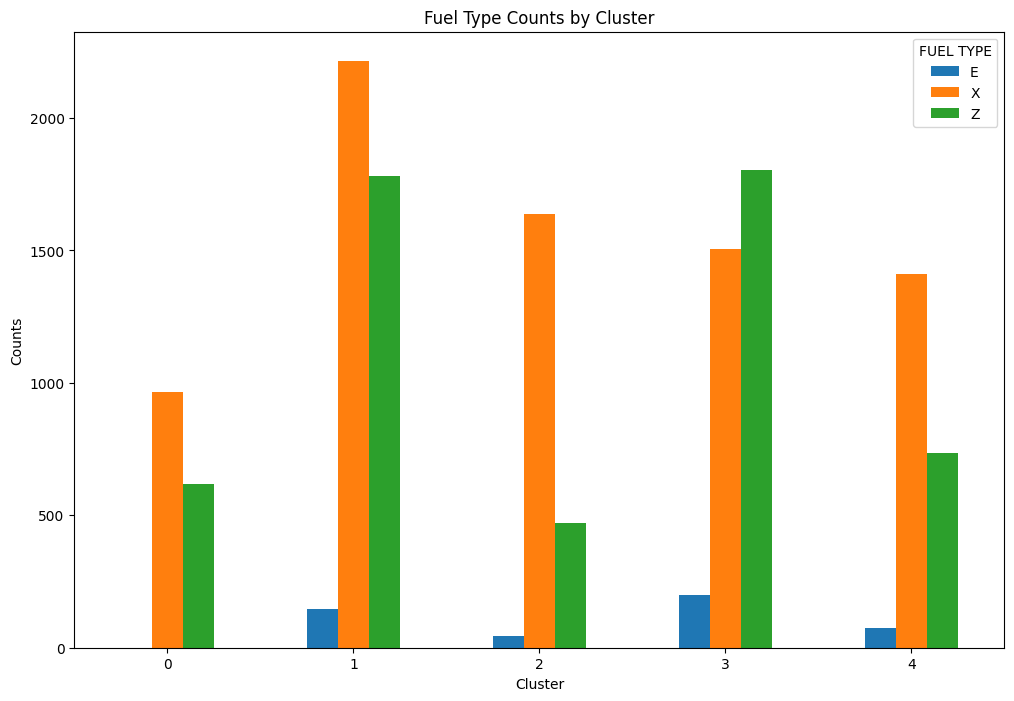

In [526]:
# Assuming df_filtered is your DataFrame

# Group by 'cluster' and 'VEHICLE CLASS', then count the occurrences
vehicle_class_counts = df_filtered1.groupby(['cluster5', 'VEHICLE CLASS']).size().unstack(fill_value=0)

# Group by 'cluster' and 'FUEL Type', then count the occurrences
fuel_type_counts = df_filtered1.groupby(['cluster5', 'FUEL Type']).size().unstack(fill_value=0)

# Set the desired size of the plot
plot_size = (12, 8)  # Width, Height in inches

# Create a bar plot for vehicle class counts with increased size
vehicle_class_counts.plot(kind='bar', stacked=False, figsize=plot_size)
plt.title('Vehicle Class Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotates X-axis labels to show them horizontally
plt.legend(title='VEHICLE CLASS')
plt.show()

# Create a bar plot for fuel type counts with increased size
fuel_type_counts.plot(kind='bar', stacked=False, figsize=plot_size)
plt.title('Fuel Type Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotates X-axis labels to show them horizontally
plt.legend(title='FUEL TYPE')
plt.show()